In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

## Tabla resumen con información a nivel hogar

Esta tabla contiene las variables construidas, a partir de las 11 tablas de la base de datos, que permiten tener agrupada la información con la cual se obtienen los principales tabulados que el INEGI construye.

`CONCENTRADOHOGAR`

In [2]:
file = '../../../../data/inegi-encuestas/localidad/ENIGH/concentradohogar.csv'

In [6]:
df = pd.read_csv(file, encoding='latin')

In [75]:
df.shape

(70311, 127)

In [7]:
df_copy = df.copy()

In [8]:
df_copy.head()

,folioviv,foliohog,ubica_geo,ageb,tam_loc,est_socio,est_dis,upm,factor,clase_hog,...,mater_serv,material,servicio,deposito,prest_terc,pago_tarje,deudas,balance,otras_erog,smg
0,100003801,1,10010000,000-0,1,4,3,10,247,2,...,98.36,98.36,0.00,0.0,0.0,17409.83,0.0,0.0,0.0,6573.6
1,100003802,1,10010000,000-0,1,4,3,10,247,2,...,0.00,0.00,0.00,0.0,0.0,5360.65,0.0,0.0,0.0,6573.6
2,100003803,1,10010000,000-0,1,4,3,10,247,2,...,172.13,0.00,172.13,0.0,0.0,23606.55,0.0,0.0,0.0,6573.6
3,100003804,1,10010000,000-0,1,4,3,10,247,3,...,0.00,0.00,0.00,0.0,0.0,8852.45,0.0,0.0,0.0,6573.6
4,100003805,1,10010000,000-0,1,4,3,10,247,2,...,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,6573.6


In [10]:
df_copy.columns

Index(['folioviv', 'foliohog', 'ubica_geo', 'ageb', 'tam_loc', 'est_socio',
       'est_dis', 'upm', 'factor', 'clase_hog',
       ...
       'mater_serv', 'material', 'servicio', 'deposito', 'prest_terc',
       'pago_tarje', 'deudas', 'balance', 'otras_erog', 'smg'],
      dtype='object', length=127)

### Subset Ciudad de México

`ubica_geo`: Ubicación geográfica.

Los dos primeros dígitos representan la clave de la entidad, los siguientes tres la clave del municipio y los últimos cuatro la clave de la localidad.

In [13]:
df_copy.ubica_geo.head()

0    10010000
1    10010000
2    10010000
3    10010000
4    10010000
Name: ubica_geo, dtype: int64

In [18]:
df_copy.ubica_geo = df_copy.ubica_geo.astype(str)

In [19]:
len(df_copy.ubica_geo[0])

8

In [20]:
for line in range(0, df_copy.shape[0]):
    if(len(df_copy.ubica_geo[line]) == 8):
        df_copy.ubica_geo[line] = '0' + df_copy.ubica_geo[line]

/Users/jacoboleon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
df_copy.ubica_geo[0]

'010010000'

In [22]:
df_copy.ubica_geo[0][:2]

'01'

In [23]:
l_ent = []
l_mun = []
l_loc = []

In [24]:
for line in range(0, df_copy.shape[0]):
    l_ent.append(df_copy.ubica_geo[line][:2])
    l_mun.append(df_copy.ubica_geo[line][2:5])
    l_loc.append(df_copy.ubica_geo[line][5:])

In [26]:
len(l_ent) == len(l_mun) == len(l_loc)

True

In [27]:
df_copy['ent'] = l_ent
df_copy['mun'] = l_mun
df_copy['loc'] = l_loc

In [33]:
df_copy.ent.nunique()

32

In [46]:
df_09 = df_copy[df_copy.ent == '09']

In [47]:
df_09 = df_09.copy()

In [48]:
df_09.head()

,folioviv,foliohog,ubica_geo,ageb,tam_loc,est_socio,est_dis,upm,factor,clase_hog,...,deposito,prest_terc,pago_tarje,deudas,balance,otras_erog,smg,ent,mun,loc
20824,900168801,1,090020000,000-0,1,2,133,24120,1265,3,...,0.0,0.0,0.0,0.00,0.0,0.0,6573.6,09,002,0000
20825,900168802,1,090020000,000-0,1,2,133,24120,1265,1,...,0.0,0.0,0.0,0.00,0.0,0.0,6573.6,09,002,0000
20826,900168804,1,090020000,000-0,1,2,133,24120,1265,2,...,0.0,0.0,0.0,0.00,0.0,0.0,6573.6,09,002,0000
20827,900168805,1,090020000,000-0,1,2,133,24120,1265,1,...,0.0,0.0,0.0,0.00,0.0,0.0,6573.6,09,002,0000
20828,900168806,1,090020000,000-0,1,2,133,24120,1265,1,...,0.0,0.0,0.0,10327.86,0.0,0.0,6573.6,09,002,0000


In [49]:
#list(df_09.columns)

In [50]:
df_09['loc'].unique()

array(['0000'], dtype=object)

In [51]:
list_folios = ['folioviv', 'foliohog', 'ubica_geo', 'ageb', 'est_dis', 'upm', 'factor', 'smg', 'ent', 'loc']

In [52]:
df_09.drop(labels=list_folios, axis=1, inplace=True)

In [64]:
df_09.fillna(value=-1, inplace=True)

In [65]:
df_09.replace(to_replace=-1, value=np.NaN, inplace=True)

Text(0, 0.5, 'Observaciones')

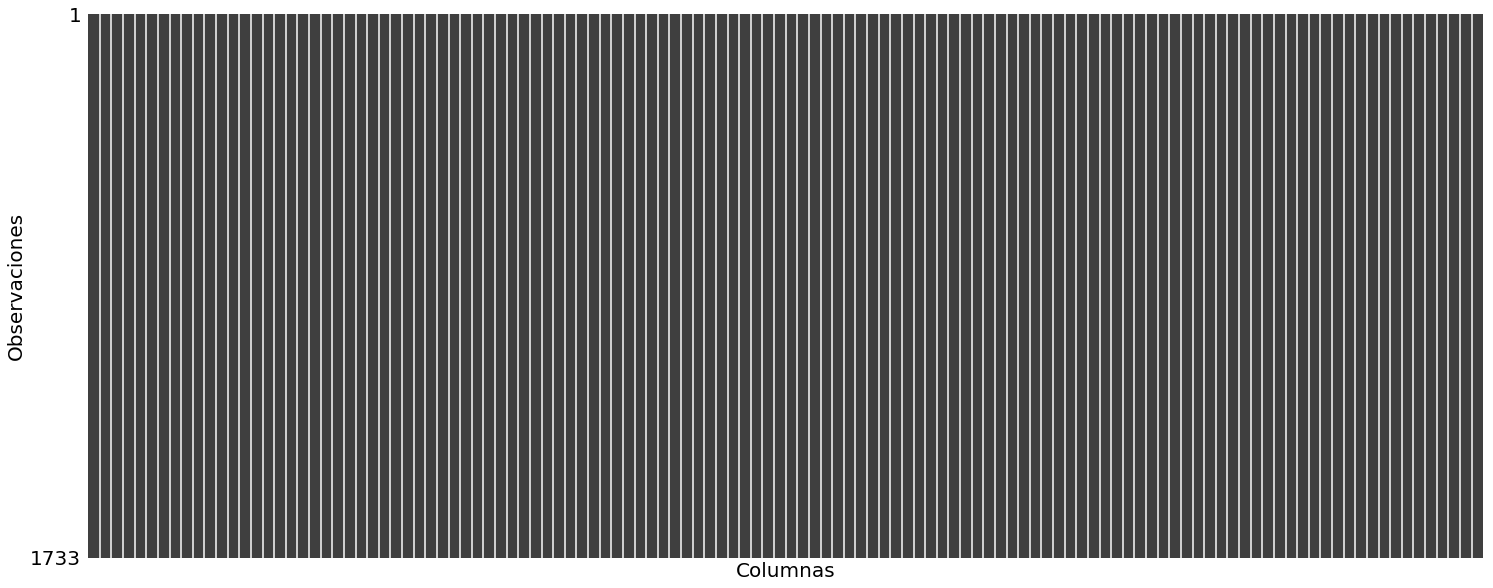

In [66]:
msno.matrix(df_09, fontsize=50, sparkline=False, labels=False)
plt.xlabel('Columnas', fontsize=20)
plt.ylabel('Observaciones', fontsize=20)
#plt.savefig('../../../images/envipe/df_tmod_vic_envipe2016_09.png', dpi=300)

Text(0, 0.5, 'Observaciones')

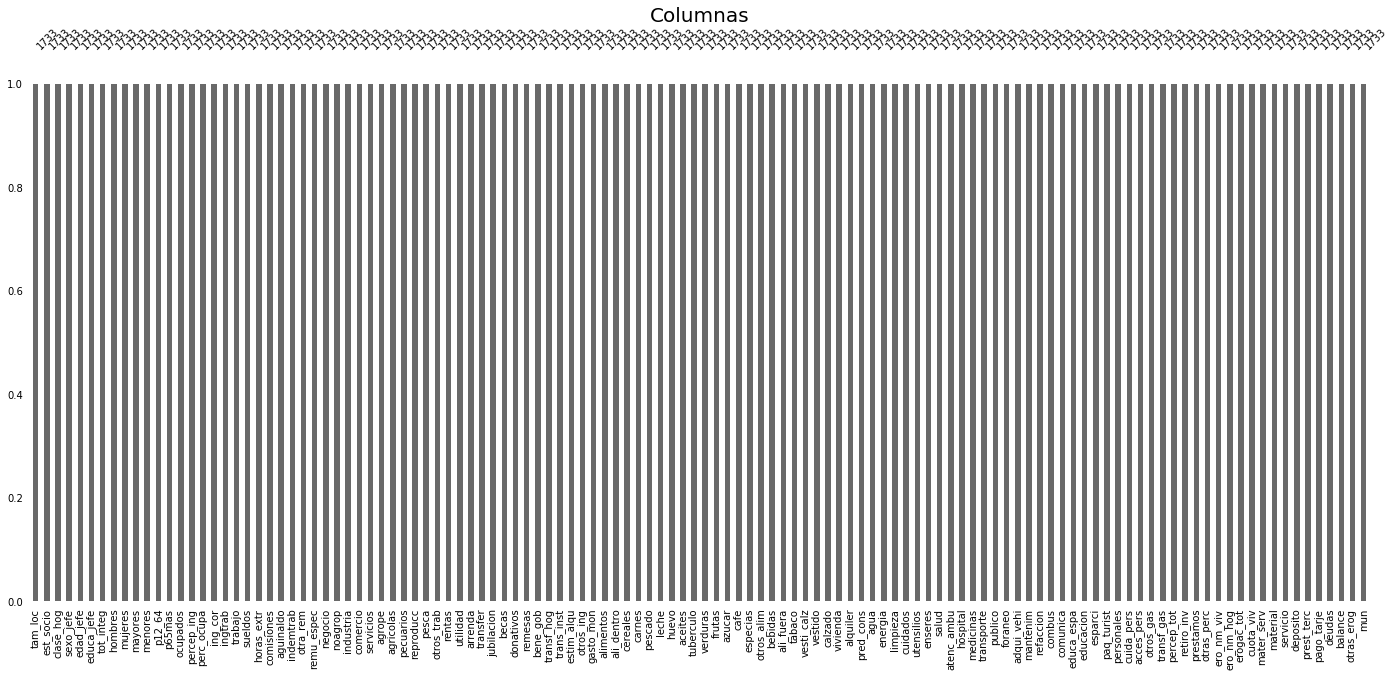

In [67]:
msno.bar(df_09, fontsize=10, labels=False)
plt.xlabel('Columnas', fontsize=20)
plt.ylabel('Observaciones', fontsize=20)
#plt.savefig('../../../images/envipe/df_tmod_vic_envipe2016_09.png', dpi=300)

In [68]:
df_09.replace(to_replace=np.NaN, value=-1, inplace=True)

In [72]:
df_09.columns[df_09.isnull().any()].tolist()

[]

In [69]:
threshold = round(df_09.shape[0]*.8)
threshold

1386

In [73]:
l = []
for column in df_09.columns:
    na_column =  df_09[column].value_counts().get(-1)
    if(na_column != None):
        if (df_09.shape[0] - na_column < threshold):
            print(column, ': ', df_09.shape[0] - na_column, ' - ', threshold)
            print(column, 'd e l e t e d')
            l.append(column)

In [74]:
df_09.shape

(1733, 120)

In [76]:
file_df_09 = '../../../../dataframes/enigh/2016/df_09.csv'

In [77]:
df_09.to_csv(file_df_09,index = False, header = True, sep = ',', encoding = 'utf-8')